<a href="https://colab.research.google.com/github/nevermind78/Time_series/blob/main/An_Introduction_to_Darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DARTS

- A very easy time series analysis library
- Allows  univariate and multivariate time series fore-casting.
- Has models like `arima`, `auto-arima`, `deep neural networks`
- Similar to sklearn
- Uses fit and predict method
- Example uses in build dataset

Let's start.

# Installing And Loading

In [ ]:
import pandas as pd


In [ ]:
!pip install darts

     |████████████████████████████████| 253 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 37.9 MB/s 
     |████████████████████████████████| 1.4 MB 36.3 MB/s 
     |████████████████████████████████| 177 kB 49.1 MB/s 
     |████████████████████████████████| 28.5 MB 62 kB/s 
     |████████████████████████████████| 10.3 MB 34.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.7 kB/s 
     |████████████████████████████████| 155 kB 46.8 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 9.9 MB 23.8 MB/s 
     |████████████████████████████████| 62 kB 803 kB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 788 kB 32.4 MB/s 
     |████████████████████████████████| 9.8 MB 38.0 MB/s 
     |████████████████████████████████| 374 kB 48.2 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 214 kB 42.7 MB/s 
  Created wheel for 

# Loading Datasets

In [ ]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

AirPassengersDataset - Dataset about how many passenger rode on a particular date 

MonthlyMilkDataset - Dataset about ammout of milk cow produces every month


# Checking The Data

In [ ]:
# checking raw
AirPassengersDataset().load()


<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample

Mixture of Array and Coordiantes where:
- Passengers - array - int64
- Month - DateTime


In [ ]:
# array + df - conversion to dataframe
print("Air Passanger Dataset\n",AirPassengersDataset().load().pd_dataframe())
print("\nMonthly Milk Dataset\n",MonthlyMilkDataset().load().pd_dataframe())

Air Passanger Dataset
 component   #Passengers
Month                  
1949-01-01        112.0
1949-02-01        118.0
1949-03-01        132.0
1949-04-01        129.0
1949-05-01        121.0
...                 ...
1960-08-01        606.0
1960-09-01        508.0
1960-10-01        461.0
1960-11-01        390.0
1960-12-01        432.0

[144 rows x 1 columns]

Monthly Milk Dataset
 component   Pounds per cow
Month                     
1962-01-01           589.0
1962-02-01           561.0
1962-03-01           640.0
1962-04-01           656.0
1962-05-01           727.0
...                    ...
1975-08-01           858.0
1975-09-01           817.0
1975-10-01           827.0
1975-11-01           797.0
1975-12-01           843.0

[168 rows x 1 columns]


same as raw but in a dataframe format :
- Month/Day/Date column : `Month`
- Associated Data : `Passengers`

# Plotting the Dataset

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.3
     |████████████████████████████████| 13.1 MB 105 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requi

In [ ]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading Dataset
air_ds = AirPassengersDataset().load()
milk_ds = MonthlyMilkDataset().load()

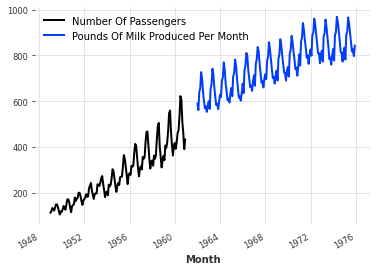

In [ ]:
air_ds.plot(label="Number Of Passengers")
milk_ds.plot(label="Pounds Of Milk Produced Per Month" )
plt.legend();

# Data processing 
Includes:
- Standard Scaling
- Train Test Split


## Standard Scaling

Standard scaling  technique can be used to convert varied data on the same scale.

- `Scaler()` - Provided by dart uses same `fit_transform` method as provided by other libraries and works the same way.

**fit_transform is different from fit in that it combines both fit and transform methods on one go. One may want to use it as it increases efficiency for the data scaling and reduce the code**

In [ ]:
from darts.dataprocessing.transformers import Scaler

# creating scaler object
scaler_air , scaler_milk = Scaler(), Scaler()


In [ ]:
# prefroming the scaling
air_ds_scaled = scaler_air.fit_transform(air_ds)
milk_ds_scaled = scaler_milk.fit_transform(milk_ds)

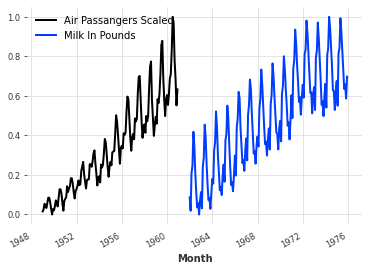

In [ ]:
# plottingair_ds.plot(label="Number Of Passengers")
air_ds_scaled.plot(label = "Air Passangers Scaled")
milk_ds_scaled.plot(label = "Milk In Pounds")
plt.legend();

Both dataset observation is now on same scale of 0-1

## Train Test Split - Includes last as it is most promising data
- train set - first 36 data point
- val set - next 36 data point

In [ ]:
train_air_ds,  val_air_ds = air_ds_scaled[:-36], air_ds_scaled[-36:] 
train_milk_ds, val_milk_ds = milk_ds_scaled[:-36], milk_ds_scaled[-36:]

# Creating Model And Forecasting

Will create a single model which will forecast for both dataset - great!

In [ ]:
# importing model
from darts.models import NBEATSModel

In [ ]:
# creating a model object
model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)

In [ ]:
# fitting the model
model.fit([train_air_ds, train_milk_ds], verbose = True)

[2021-10-23 12:45:22,927] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-10-23 12:45:22,927] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-10-23 12:45:23,034] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-23 12:45:23,034] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:01<02:38,  1.60s/it]

 11%|█         | 11/100 [00:16<02:13,  1.50s/it]

 21%|██        | 21/100 [00:42<03:50,  2.92s/it]

 31%|███       | 31/100 [01:16<03:27,  3.01s/it]

 41%|████      | 41/100 [01:51<03:18,  3.36s/it]

 51%|█████     | 51/100 [02:23<02:47,  3.42s/it]

 61%|██████    | 61/100 [02:56<02:15,  3.47s/it]

 71%|███████   | 71/100 [03:29<01:31,  3.16s/it]

 81%|████████  | 81/100 [04:01<00:54,  2.86s/it]

 91%|█████████ | 91/100 [04:35<00:29,  3.33s/it]

100%|██████████| 100/100 [05:05<00:00,  3.06s/it]


# Predict Results +  Evaluation
MAPE - Mean Average Precession Error

In [ ]:
# imports
from darts.metrics import mape

In [ ]:
pred_air = model.predict(n = 36, series = train_air_ds)
pred_milk = model.predict(n =36, series = train_milk_ds)

print("Mape = {:.2f}%".format(mape(air_ds_scaled , pred_air)))
print("Mape = {:.2f}%".format(mape(milk_ds_scaled , pred_milk)))

Mape = 6.23%
Mape = 16.82%


**Air Ds**

Mape = 6.74%


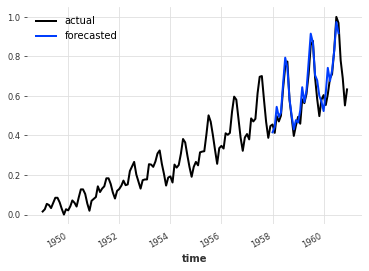

In [ ]:
# plotting results
air_ds_scaled.plot(label = "actual")
pred.plot(label = "forecasted") # validation data set
plt.legend()

print("Mape = {:.2f}%".format(mape(air_ds_scaled , pred)))

**Milk Ds**

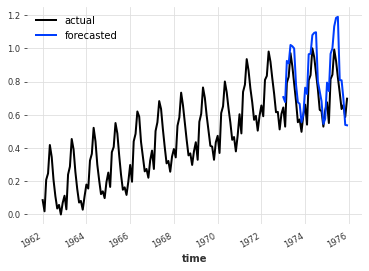

In [ ]:


# plotting results
milk_ds_scaled.plot(label = "actual")
pred.plot(label = "forecasted") # validation data set
plt.legend()



Helps in easy forecasting of time series data , without worrying much about hyper paramerters of most of the models in it.


Exploring some of the features of darts models will be benificial